In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS


In [40]:
df = pd.read_csv("DF_final.csv")

In [29]:
#Verificamos el contenido y tipos de datos del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  3419 non-null   object        
 1   budget                 32476 non-null  float64       
 2   genres                 45476 non-null  object        
 3   id                     32476 non-null  float64       
 4   production_companies   32476 non-null  object        
 5   production_countries   32476 non-null  object        
 6   release_date           32476 non-null  datetime64[ns]
 7   revenue                32476 non-null  float64       
 8   runtime                32422 non-null  float64       
 9   title                  32476 non-null  object        
 10  vote_average           32476 non-null  float64       
 11  vote_count             32476 non-null  float64       
 12  return                 32476 non-null  float64       
 13  r

In [30]:
#Estadísticas del DataFrame
df.describe()

,budget,id,release_date,revenue,runtime,vote_average,vote_count,return,release_year,id.1
count,3.247600e+04,32476.000000,32476,3.247600e+04,32422.000000,32476.000000,32476.000000,3.247600e+04,32476.000000,45476.000000
mean,5.727921e+06,97331.916061,1991-08-30 14:26:30.048035456,1.525193e+07,95.804947,5.663290,146.837203,8.372409e+02,1991.164799,108345.997537
min,0.000000e+00,3.000000,1902-09-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1902.000000,2.000000
25%,0.000000e+00,21059.000000,1976-08-26 12:00:00,0.000000e+00,86.000000,5.075000,4.000000,0.000000e+00,1976.000000,26443.250000
50%,0.000000e+00,48954.500000,2000-03-15 00:00:00,0.000000e+00,95.000000,6.000000,14.000000,0.000000e+00,2000.000000,60002.500000
75%,0.000000e+00,128133.750000,2010-10-05 06:00:00,0.000000e+00,106.000000,6.700000,53.000000,0.000000e+00,2010.000000,157302.000000
max,3.800000e+08,469172.000000,2020-12-16 00:00:00,2.787965e+09,1140.000000,10.000000,14075.000000,1.239638e+07,2020.000000,469172.000000
std,2.030601e+07,109038.325407,NaN,7.531601e+07,32.961657,1.739882,574.888235,8.695603e+04,23.634369,112443.796536


In [33]:
# Dividir la columna de género en columnas separadas
genres_df = df['genres'].str.split(',', expand=True)

# Renombrar las columnas
num_cols = len(genres_df.columns)
genres_df.columns = [f'genres_{i}' for i in range(1, num_cols + 1)]

# Combinar las nuevas columnas con el DataFrame original
df = pd.concat([df, genres_df], axis=1)

In [35]:
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce') #Asegurarse de que la columna 'rating' esté en formato numérico

top_rates = df.groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(10) # Agrupar el DataFrame por el campo 'genre' y calcula el promedio de las calificaciones para cada grupo
top_rates_df = pd.DataFrame({'Género': top_rates.index, 'rating': top_rates.values}).round(2) #Crear un nuevo DataFrame con los resultados
top_rates_df

,Género,rating
0,"['Comedy', 'Documentary', 'Music', 'TV Movie']",10.0
1,"['Action', 'Adventure', 'Fantasy', 'Drama', 'R...",10.0
2,"['Romance', 'Adventure', 'Crime', 'Drama']",10.0
3,"['Comedy', 'Animation', 'Drama']",9.4
4,"['Western', 'Action', 'Drama', 'History']",9.3
5,"['Action', 'Drama', 'Mystery', 'Romance', 'Sci...",9.0
6,"['Romance', 'Crime', 'Drama', 'Mystery', 'Thri...",8.8
7,"['Drama', 'Family', 'Fantasy', 'Music']",8.7
8,"['Documentary', 'Mystery', 'Foreign']",8.5
9,"['Documentary', 'Family', 'Drama']",8.5


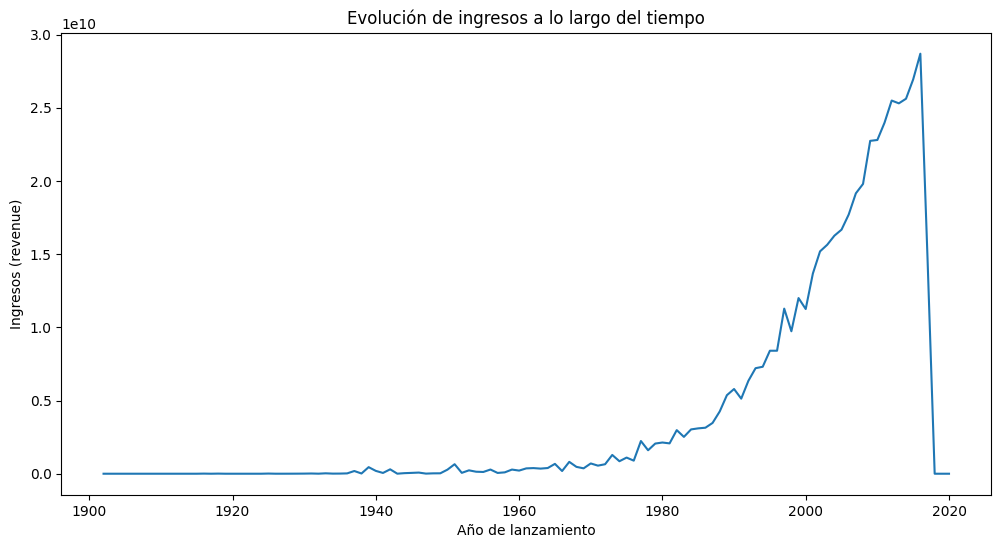

In [43]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Agrupar por año y calcular los ingresos totales
ingresos_anuales = df.groupby('release_year')['revenue'].sum()

# Gráfico de línea
plt.figure(figsize=(12, 6))
ingresos_anuales.plot(kind='line')
plt.title("Evolución de ingresos a lo largo del tiempo")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ingresos (revenue)")
plt.show()


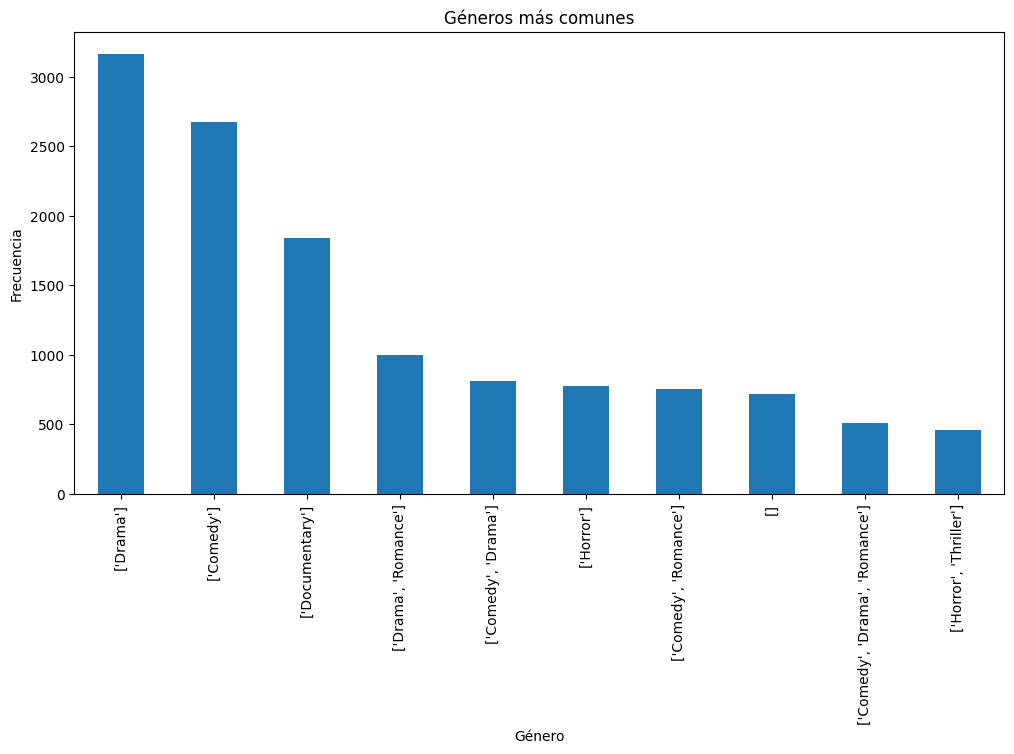

In [44]:
from collections import Counter

# Extraer los géneros
generos = df['genres'].dropna().str.split('|').sum()
conteo_generos = Counter(generos)

# Gráfico de géneros más comunes
plt.figure(figsize=(12, 6))
pd.Series(conteo_generos).nlargest(10).plot(kind='bar')
plt.title("Géneros más comunes")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()


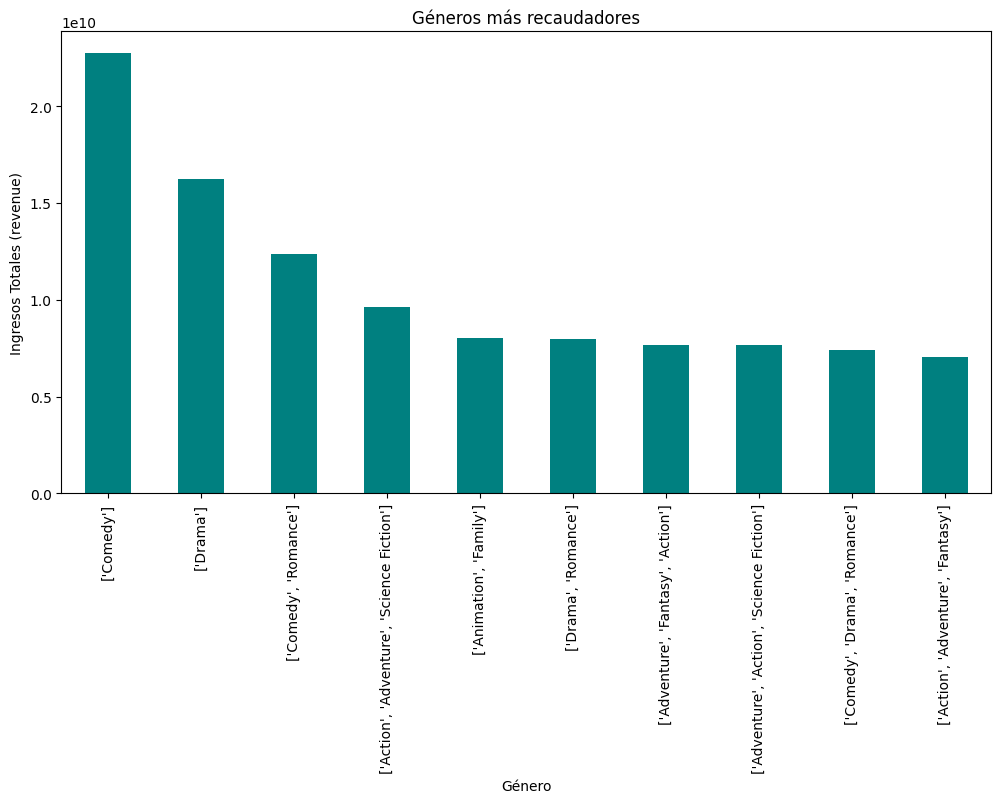

In [45]:
# Crear un DataFrame para cada género y su recaudación total
genero_revenue = df['genres'].str.get_dummies('|').multiply(df['revenue'], axis=0)
revenue_por_genero = genero_revenue.sum().sort_values(ascending=False)

# Gráfico de géneros más recaudadores
plt.figure(figsize=(12, 6))
revenue_por_genero.head(10).plot(kind='bar', color='teal')
plt.title("Géneros más recaudadores")
plt.xlabel("Género")
plt.ylabel("Ingresos Totales (revenue)")
plt.show()


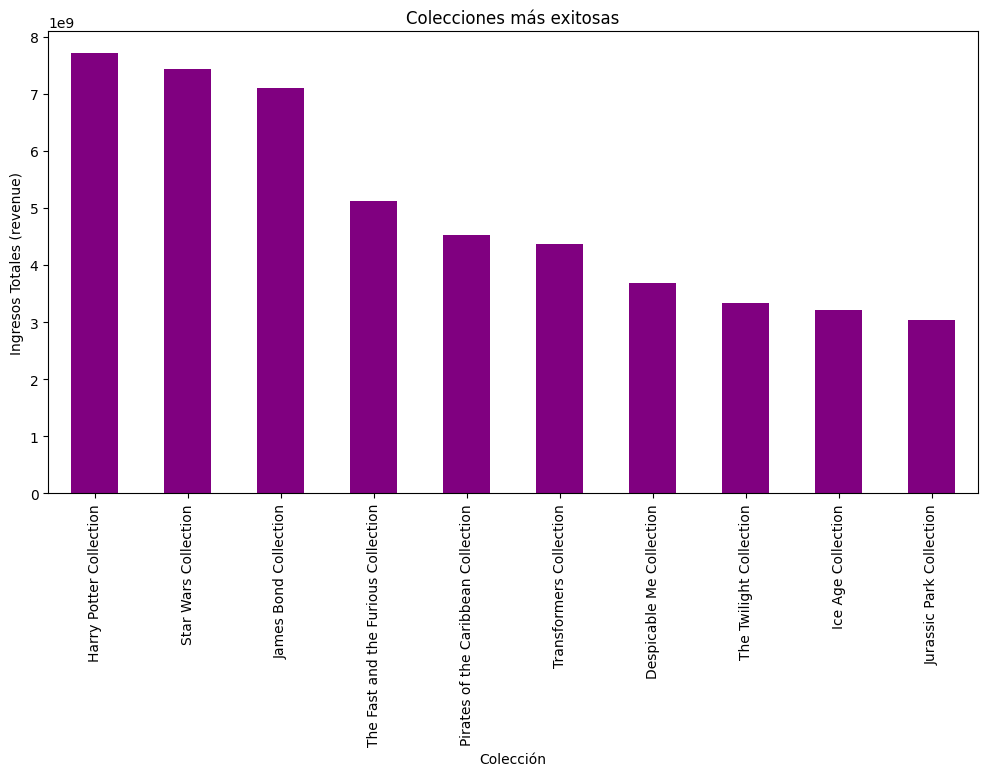

In [46]:
colecciones_exitosas = df.groupby('belongs_to_collection')['revenue'].sum().sort_values(ascending=False)

# Gráfico de colecciones más exitosas
plt.figure(figsize=(12, 6))
colecciones_exitosas.head(10).plot(kind='bar', color='purple')
plt.title("Colecciones más exitosas")
plt.xlabel("Colección")
plt.ylabel("Ingresos Totales (revenue)")
plt.show()


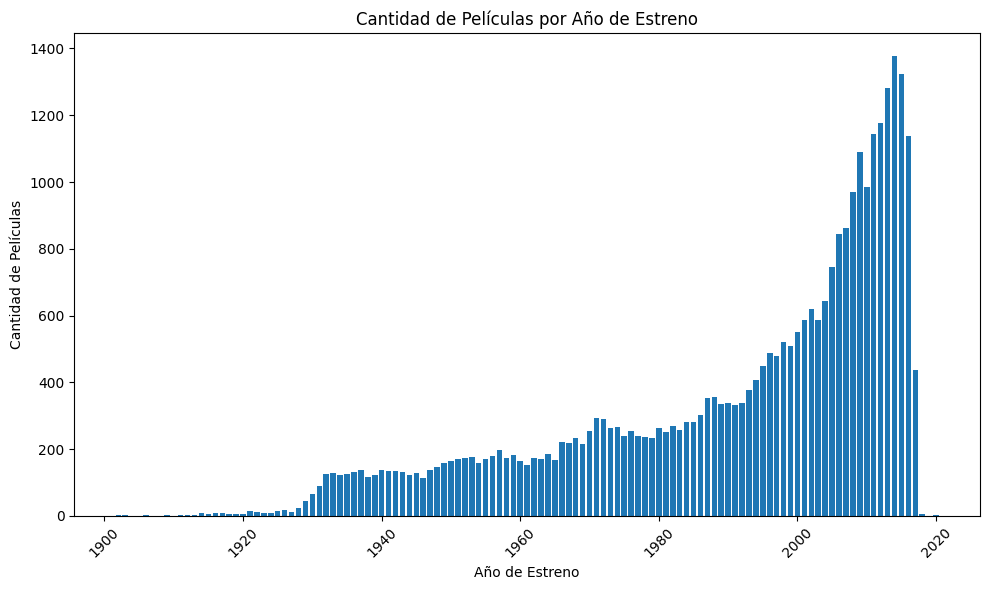

In [49]:
# Se agrupa las peliculas por año de estreno y se representa la información en un grafico de barras. 
pelis_agrupadas = df.groupby('release_year').size().reset_index(name='movie_count')

plt.figure(figsize=(10, 6))
plt.bar(pelis_agrupadas['release_year'], pelis_agrupadas['movie_count'])
plt.xlabel('Año de Estreno')
plt.ylabel('Cantidad de Películas')
plt.title('Cantidad de Películas por Año de Estreno')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

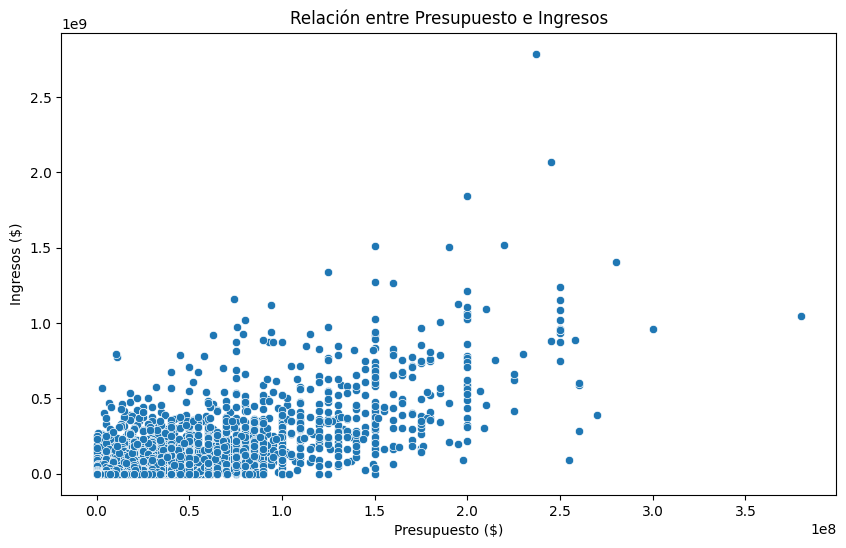

In [50]:
# 7. Relación entre presupuesto e ingresos
plt.figure(figsize=(10,6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Relación entre Presupuesto e Ingresos')
plt.xlabel('Presupuesto ($)')
plt.ylabel('Ingresos ($)')
plt.show()

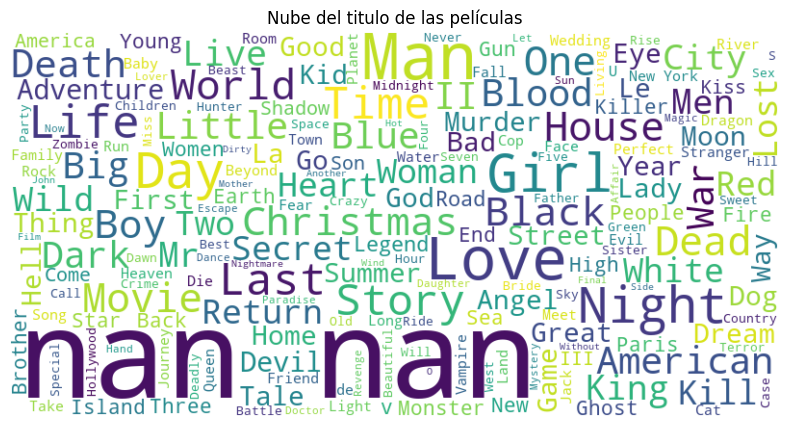

In [58]:
df['title'] = df['title'].dropna()
# Nube de las palabras más frencuentes en el titulo de las peliculas
all_overviews = ' '.join(df['title'].astype(str))

# se crea el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_overviews)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube del titulo de las películas')
plt.show()

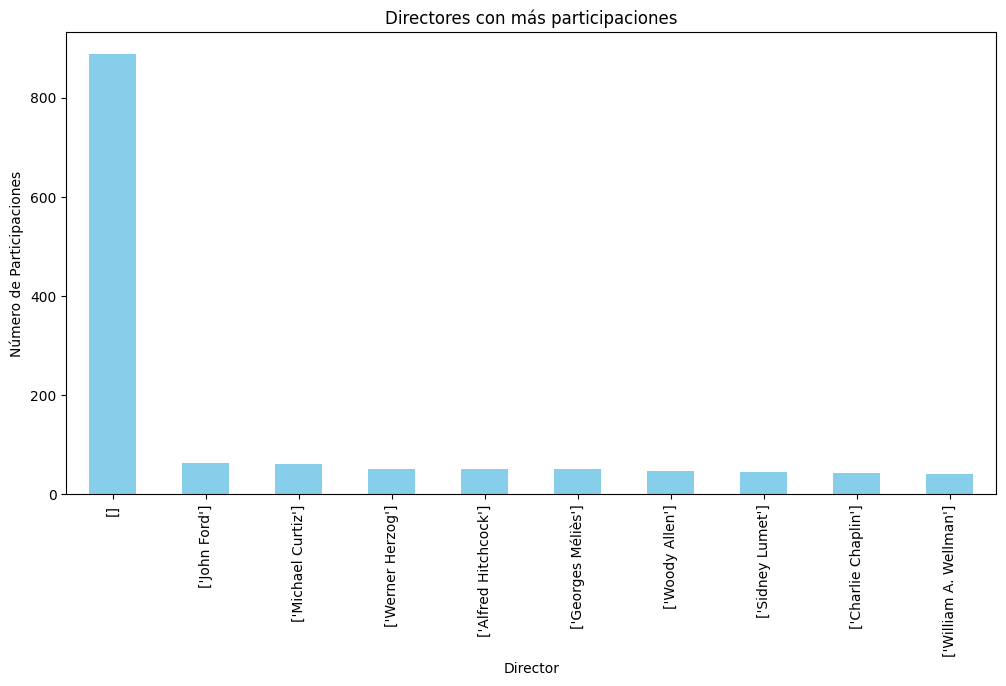

In [ ]:
directores = df['director_info'].dropna().str.split('|').sum()
conteo_directores = Counter(directores)

# Gráfico de directores con más participaciones
plt.figure(figsize=(12, 6))
pd.Series(conteo_directores).nlargest(10).plot(kind='bar', color='skyblue')
plt.title("Directores con más participaciones")
plt.xlabel("Director")
plt.ylabel("Número de Participaciones")
plt.show()
